In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# !pip install easydev                 
# !pip install colormap                
# !pip install opencv-python           
# !pip install colorgram.py            
# !pip install extcolors         

import cv2
import extcolors
from colormap import rgb2hex

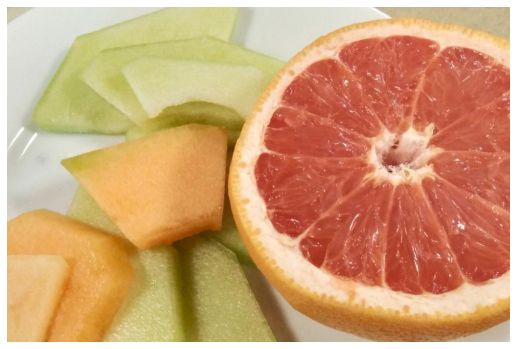

In [3]:
input_name = 'Images/img1.jpeg'
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

#save
resize_name = input_name.split(".jpeg")[0]+"_resize.jpeg"  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((196, 91, 69), 143601),
  ((211, 210, 143), 66405),
  ((219, 152, 82), 58436),
  ((217, 218, 212), 54200),
  ((247, 220, 191), 35994),
  ((244, 185, 109), 33989),
  ((181, 169, 93), 33703),
  ((196, 181, 160), 16533),
  ((234, 189, 132), 13722),
  ((220, 124, 99), 13098),
  ((178, 107, 41), 12183),
  ((205, 131, 32), 8991)],
 540000)

In [5]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#C45B45,143601
1,#D3D28F,66405
2,#DB9852,58436
3,#D9DAD4,54200
4,#F7DCBF,35994
5,#F4B96D,33989
6,#B5A95D,33703
7,#C4B5A0,16533
8,#EABD84,13722
9,#DC7C63,13098


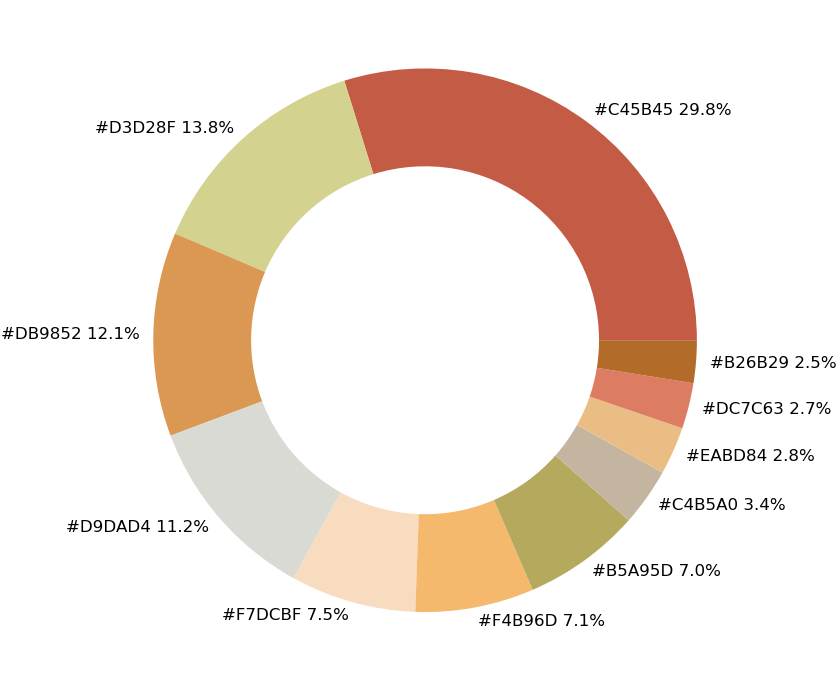

In [6]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

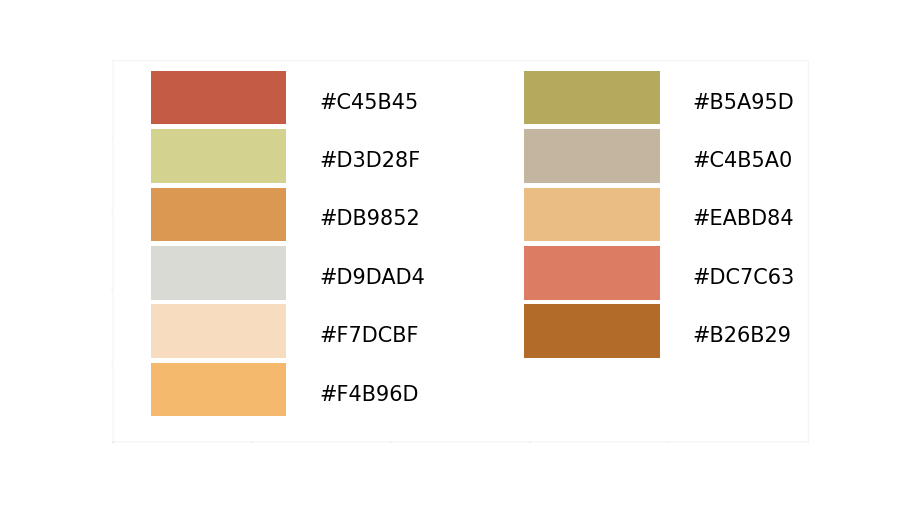

In [7]:
#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('Images/bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('Images/bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

In [8]:
def exact_color(input_image, resize, tolerance, zoom):
    #background
    bg = 'Images/bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    #resize
    output_width = resize
    img = Image.open(input_image)
    if img.size[0] >= resize:
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((output_width,hsize), Image.ANTIALIAS)
        resize_name = input_image.split(".jpeg")[0]+"_resize.jpeg"
        img.save(resize_name)
    else:
        resize_name = input_image
    
    #crate dataframe
    img_url = resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('Images/bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

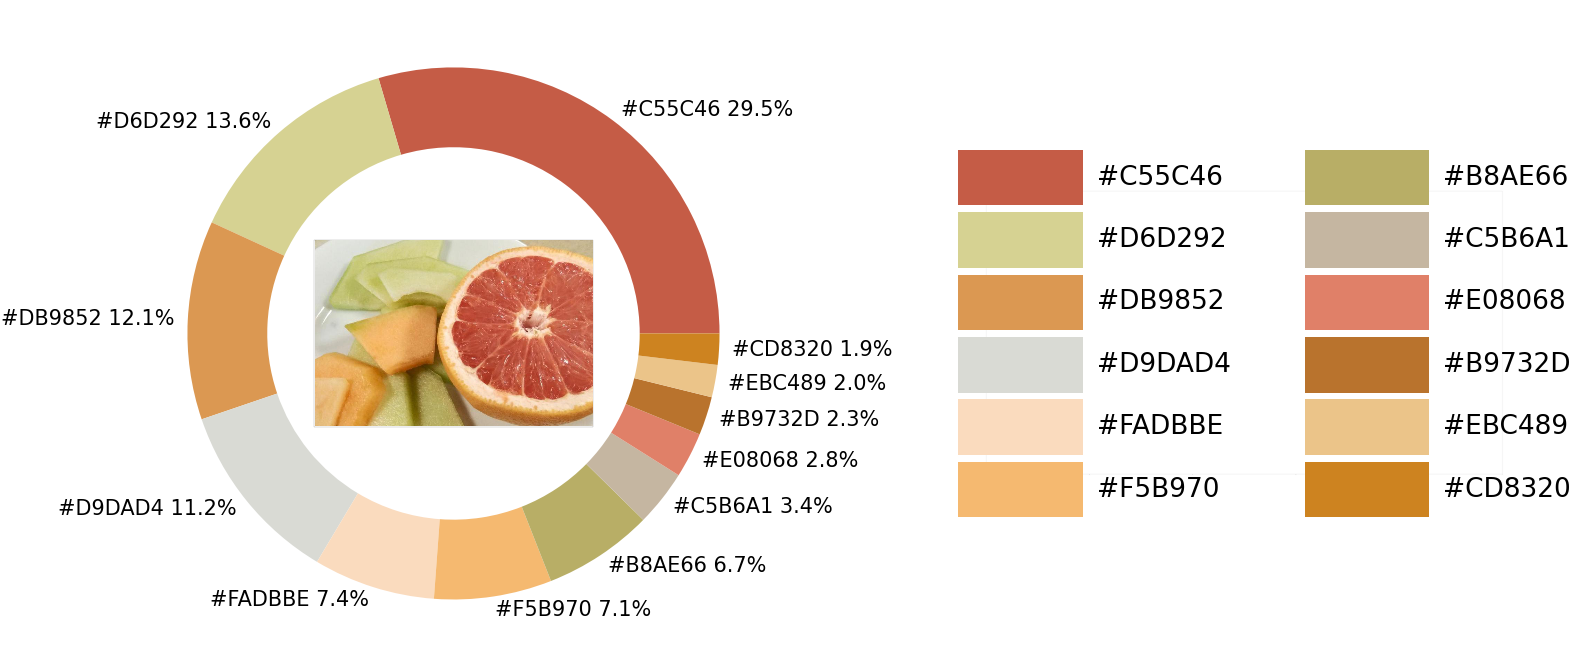

In [9]:
exact_color('Images/img1.jpeg', 800, 12, 2.5)